# Capstone project: Building tree-based model with extensive feature engineering for predicting whether an employee will churn or not

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

The goal in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

###  HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 



Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (  
    classification_report,  
    accuracy_score,  
    precision_score,  
    recall_score,  
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve, roc_auc_score,
    ConfusionMatrixDisplay )

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

import statsmodels.api as sm  
from statsmodels.formula.api import ols  
from scipy import stats


### Load dataset


In [2]:
df0 = pd.read_csv("C:/Users/Admin/Desktop/adv data analytics/HR_comma_sep.csv")

df0.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather information and descriptive statistics about the data

In [3]:
# Gather basic information about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
print(df0.shape)

(14999, 10)


In [5]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df0.duplicated().sum()

3008

In [7]:
df0 = df0.drop_duplicates()

In [8]:
df0["left"].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [9]:
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)  

### Data Visualization and analyzing patterns in 'left' and 'stayed'

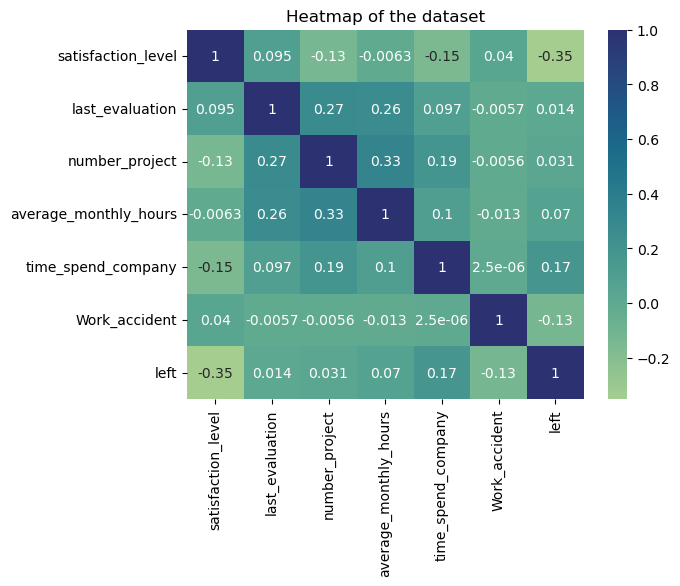

In [10]:
# Gather descriptive statistics about the data
numerical_df = df0.iloc[:,:7]

sns.heatmap(numerical_df.corr(), annot=True, cmap="crest")

plt.title("Heatmap of the dataset")
plt.show()

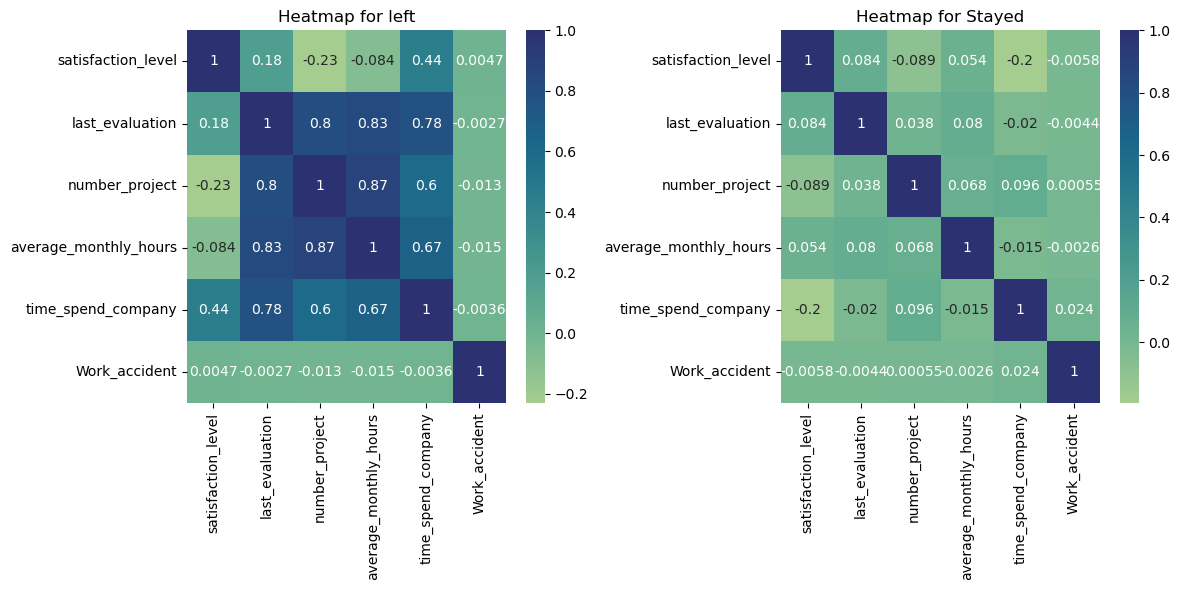

In [11]:
filtered_df_1 = df0[df0['left'] == 1]  
numerical_df_1 = filtered_df_1.iloc[:, :6]  

# Filter for left == 0  
filtered_df_0 = df0[df0['left'] == 0]  
numerical_df_0 = filtered_df_0.iloc[:, :6]  

# Create the correlation matrices  
corr_1 = numerical_df_1.corr()  
corr_0 = numerical_df_0.corr()  

# Set up the matplotlib figure  
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  

# Plot the heatmap for left == 1  
sns.heatmap(corr_1, annot=True, cmap="crest", ax=axs[0])  
axs[0].set_title("Heatmap for left")  

# Plot the heatmap for left == 0  
sns.heatmap(corr_0, annot=True, cmap="crest", ax=axs[1])  
axs[1].set_title("Heatmap for Stayed")  

# Show the plots  
plt.tight_layout()  
plt.show()  


In [12]:
# Display all column names
### YOUR CODE HERE ###
df1 = df0.groupby('left')
summary_stats = pd.DataFrame(df1.agg({  
    'satisfaction_level': ['mean', 'std'],  
    'last_evaluation': ['mean', 'std'],  
    'number_project': ['mean', 'std'],  
    'average_monthly_hours': ['mean', 'std'],  
    'time_spend_company': ['mean', 'std'],  
    'Work_accident': 'mean',  
    'promotion_last_5years': 'mean',  
}))  

# Optionally, reset the index for a cleaner DataFrame  
summary_stats.reset_index(inplace=True) 
summary_stats

left satisfaction_level           last_evaluation           number_project  \
                     mean       std            mean       std           mean   
0    0           0.667365  0.217082        0.715667  0.161919       3.786800   
1    1           0.440271  0.265207        0.721783  0.197436       3.883476   

            average_monthly_hours            time_spend_company            \
        std                  mean        std               mean       std   
0  0.981755             198.94270  45.665507           3.262000  1.367239   
1  1.817139             208.16223  61.295145           3.881467  0.974041   

  Work_accident promotion_last_5years  
           mean                  mean  
0      0.174500              0.019500  
1      0.052737              0.004018

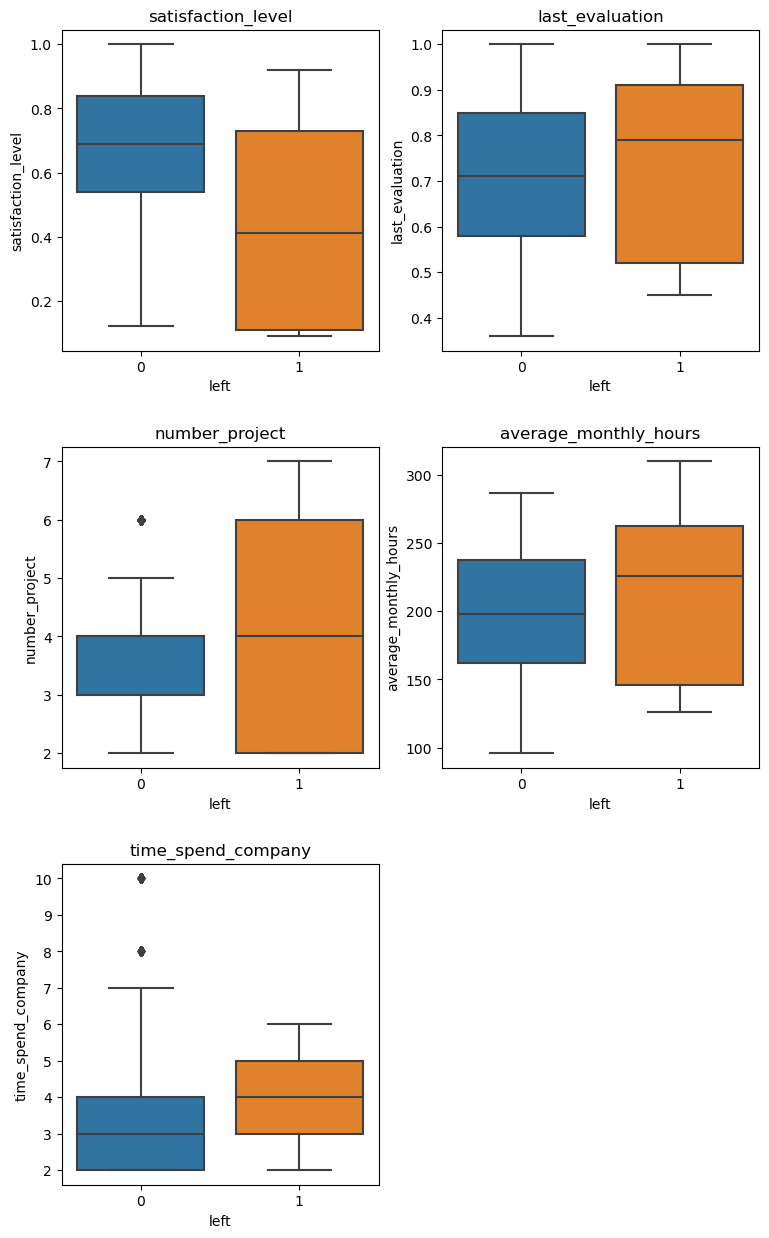

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(9, 15))  

axes = axes.flatten()  

y_vars = df0.columns[:5].tolist()

for ax, y_var in zip(axes, y_vars):  
    sns.boxplot(x='left', y=y_var, data=df0, ax=ax)  
    ax.set_title(y_var)  
    
axes[5].axis('off')
plt.subplots_adjust(hspace=0.3)

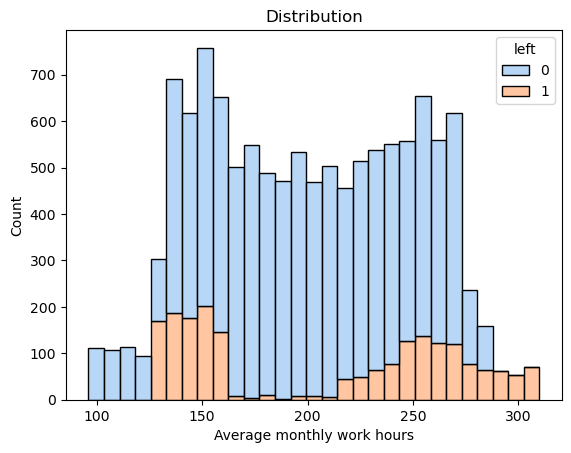

In [14]:
sns.histplot(df0, multiple="stack", x="average_monthly_hours", kde=False, palette="pastel", hue="left", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("Average monthly work hours")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()

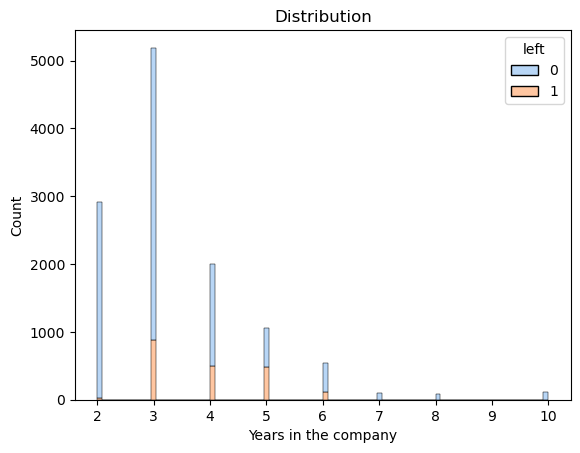

In [15]:
sns.histplot(df0, multiple="stack", x="time_spend_company", kde=False, palette="pastel", hue="left", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("Years in the company")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()

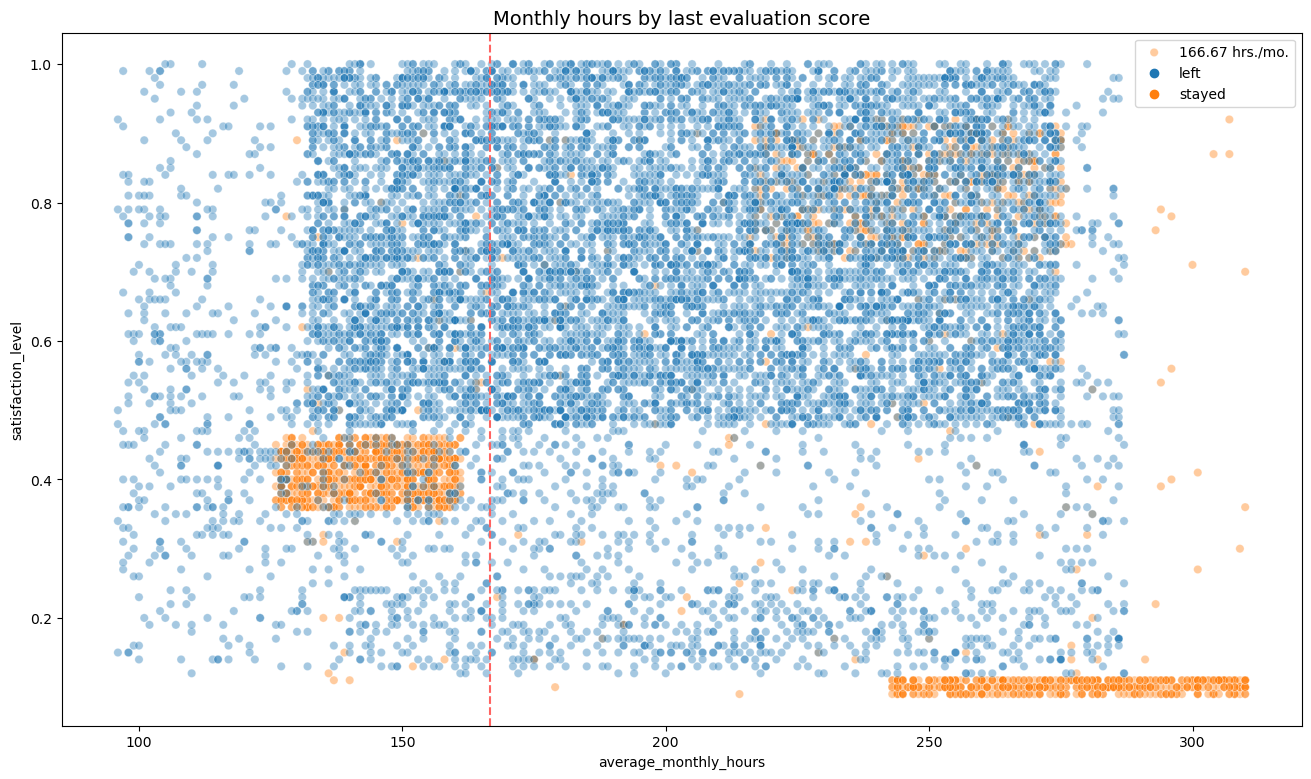

In [16]:
# Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

**We will focus on the employees who left (orange color) for the following graphs.** Most people who left have a low satisfaction level on average. We can see an inverse relation between satisfaction and monthly working hours. There is one peculiar group of former employees who work a lot and also have high satisfaction. A reason they left could be they got a better offer from some dream company.

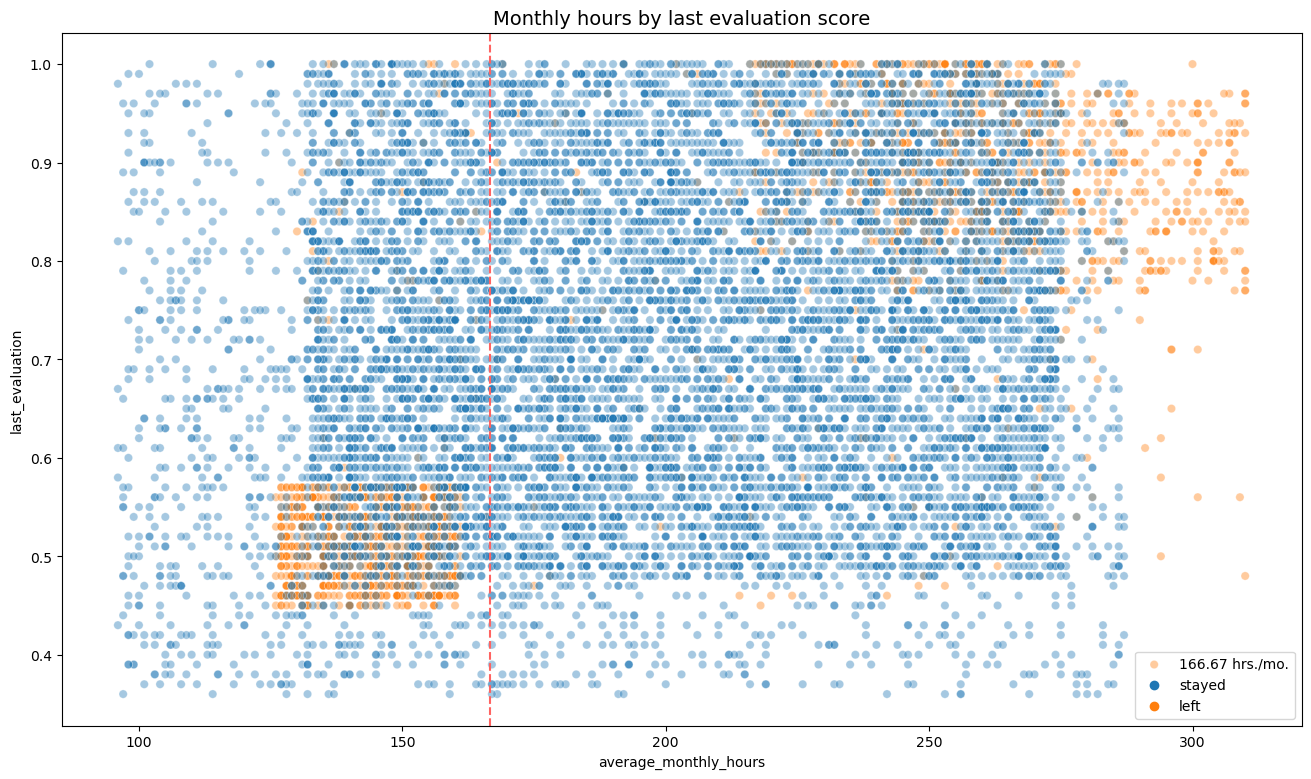

In [17]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
df0['Total_time']= df0['average_monthly_hours'] * df0['time_spend_company']
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed',  'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


df0 = df0.drop(['Total_time'], axis=1)

Unlike Satisfaction level, last_evaluation is proportional with the monthly working hours in case of former employees with few exceptions.

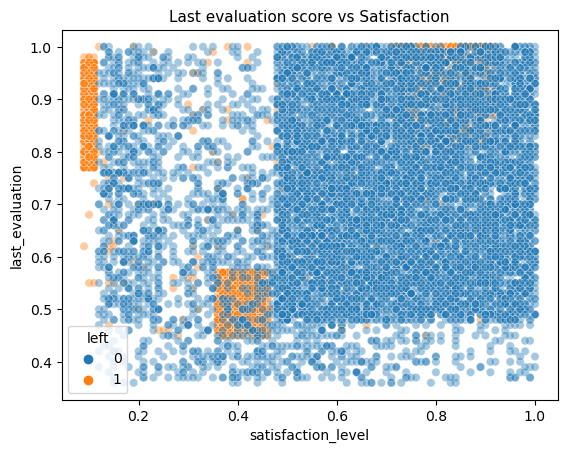

In [18]:
# last_evaluation vs  satisfaction
sns.scatterplot(data=df0, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Last evaluation score vs Satisfaction', fontsize='11');

- Again we see 2 main groups among employees who left, one with higher satisfaction but low last evaluation score and other with a very low satisfaction but high last evaluation score, indicating an negative correlation.
- There is another group of former employees who have high satisfaction, last evaluation score and working hours yet they have left, which we have previously discussed about.
- Overall majority people have above average satisfaction and last evaluation score

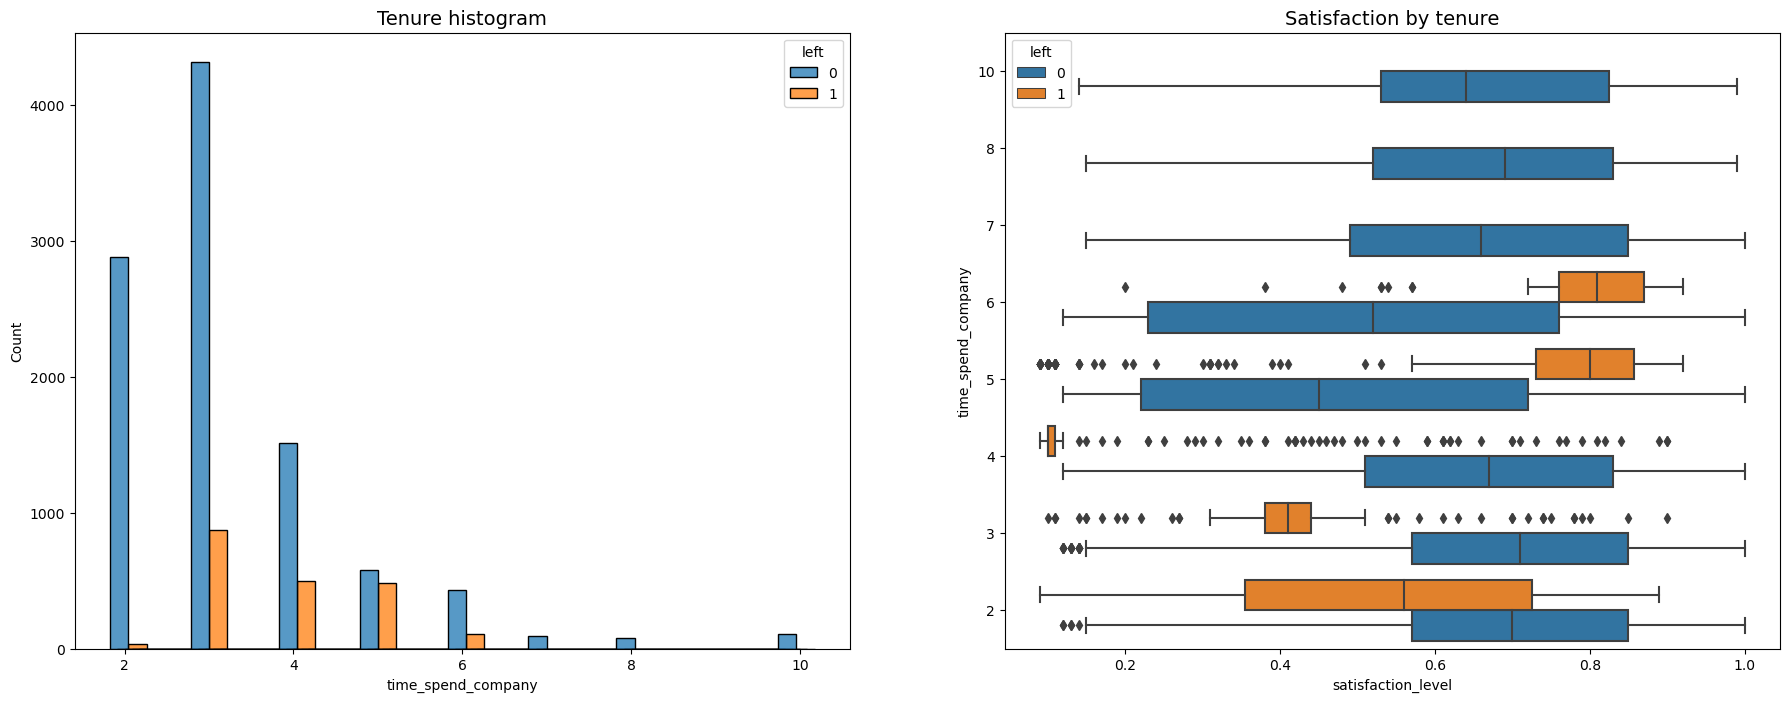

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df0, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`
sns.histplot(data=df0, x='time_spend_company', hue='left', multiple='dodge', shrink=5, ax=ax[0])
ax[0].set_title('Tenure histogram', fontsize='14')

plt.show();

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. The trend is that from 2-4 years, satisfaction of the employees' who left decreased but after 4th year, their satisfaction greatly increases, even more than the one who have stayed. Because of the sharp change after 4th year, we can create a binary feature of employees with tenure more than and less than 4 years. This feature might help to classify employees who left and who didn't. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees

In [20]:
df0.groupby('left')['Work_accident'].mean()

accident_left_data = df0.loc[df0['left'] == 1, 'Work_accident']  
accident_stayed_data = df0.loc[df0['left'] == 0, 'Work_accident']  

# Perform the T-test  
t_statistic, p_value = stats.ttest_ind(accident_left_data, accident_stayed_data, equal_var=False)  

print("T-statistic:", t_statistic)  
print("P-value: ", p_value)  

T-statistic: -19.37139069705395
P-value:  1.914951231734806e-80


The P-value is much lower than our significance level of 0.05 so we can conclude there is a statistically significant difference in work accidents of employees who stayed and employees who left.

### Check outliers

Check for outliers in the data.

In [21]:
percentile25 = df0["time_spend_company"].quantile(0.25)
percentile75 = df0["time_spend_company"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df0.loc[(df0["time_spend_company"] > upper_limit) | (df0["time_spend_company"] < lower_limit)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [22]:
# Chi-squared test to check whether 2 categorical variables are independent or not.
contingency_table = pd.crosstab(df0['left'], df0['promotion_last_5years'])  

# Run the Chi-squared test  
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)  

# Print the results  
print(f"Chi-squared Statistic: {chi2}")  
print(f"P-Value: {p_value}")  

Chi-squared Statistic: 22.992127549276592
P-Value: 1.6266615348676462e-06


Since p-value is much lesser than our signifance level of 5% (0.05) we fail to reject that the 'left' and 'promotion_last_5years' are independent. That means the latter has some effect on whether a person has left or not.

## MODEL CONSTRUCTION

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [119]:
dummy_df = pd.get_dummies(df0['Department'], prefix='Department')  

# Concatenate the dummy variables with the original DataFrame  
df0 = pd.concat([df0, dummy_df], axis=1)  


# Drop the original 'department' column if needed  
df0.drop('Department', axis=1, inplace=True)


df0['salary'] = df0['salary'].map({'low' : 0, 'medium' : 1, 'high' : 2})

df0.rename(columns={'salary': 'salary_happiness'}, inplace=True)  
df0.head(15)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_happiness,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [122]:
y = df0['left']

In [123]:
X = df0.drop(['left'], axis=1)

In [124]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=3)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


In [ ]:
y_val.value_counts()


In [299]:
rf = RandomForestClassifier(random_state=2)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [13, 14, 15],
             'max_features': [0.6, 0.7, 0.8],
            #  'max_features': 'auto'
             'max_samples': [ 0.8, 0.9, 1 ],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [100, 150]
             }


# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [300]:
%%time
rf_cv.fit(X_train, y_train)
print(rf_cv.best_score_)
print(rf_cv.best_params_)

0.9063291139240507
{'max_depth': 14, 'max_features': 0.6, 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Wall time: 3.89 s


In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_val)


In [ ]:
print("Random Forest metrics")
print("Accuracy:", "%.6f" % accuracy_score(y_val, y_pred))
print("Precision:", "%.6f" % precision_score(y_val, y_pred))
print("Recall:", "%.6f" % recall_score(y_val, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_val, y_pred))

In [25]:
xgb = XGBClassifier(objective='binary:logistic' , random_state=2)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3, 4, 5],
             'min_child_weight': [2, 3, 4],
             'learning_rate': [0.03, 0.04],
             'colsample_bytree': [0.4, 0.5, 0.6],
             'n_estimators': [600, 750, 900]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [127]:
%%time
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)



0.909704641350211
{'colsample_bytree': 0.5, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 750}
Wall time: 7min 49s


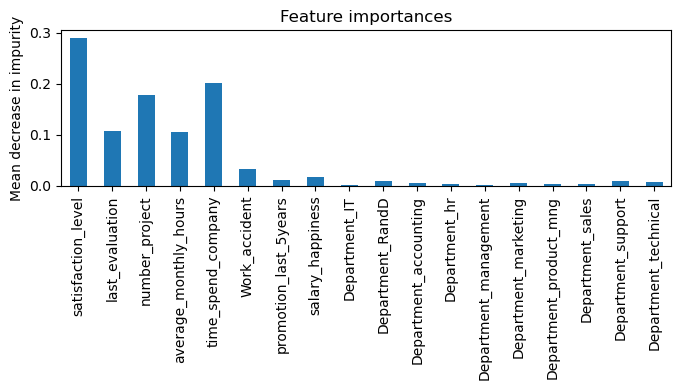

In [129]:
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_val.columns)

fig, ax = plt.subplots(figsize=(7,4))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

From here we get an idea of least-useful features for the prediction. Since our goal is to improve accuracy, we will remove less
useful features like 'Department' and 'salary_happiness' (Also, this feature is correlated to 'satisfaction_level' so we will 
remove it to avoid multicollinearity.)

In [115]:
df0.groupby(['promotion_last_5years', 'left']).size()

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
dtype: int64

Since the ratio of people that left to the people who stayed is quite different in the 2 classes of 'promotion_last_5years', it might
be useful in the classification. In other words, relatively lots of people left when they were not promoted compared to people who were promoted in the last 5 years. So we will keep this feature.

### Performing Feature selection and evaluating model :

In [23]:
df0 = df0.drop(['Department', 'salary'], axis=1)
df0.head(15)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
6,0.10,0.77,6,247,4,0,1,0
7,0.92,0.85,5,259,5,0,1,0
8,0.89,1.00,5,224,5,0,1,0
9,0.42,0.53,2,142,3,0,1,0


In [24]:
y = df0['left']

X = df0.drop(['left'], axis=1)

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=3)

In [224]:
%%time
rf_cv.fit(X_train, y_train)
print('Random Forest validation score\n')
print(rf_cv.best_score_)
print(rf_cv.best_params_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Random Forest validation score

0.9105485232067512
{'max_depth': 13, 'max_features': 0.8, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Wall time: 18min 27s


In [26]:
%%time
xgb_cv.fit(X_train, y_train)
print('XGBoost validation score\n')
print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

XGBoost validation score

0.9122362869198313
{'colsample_bytree': 0.6, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 600}
Wall time: 6min 49s


In [294]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
 
    preds = model.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [302]:
get_scores('XGBoost_val', xgb_cv.best_estimator_, X_val, y_val)


,model,precision,recall,f1,accuracy,AUC
0,XGBoost_val,0.974293,0.945137,0.959494,0.986656,0.970065


In [303]:
get_scores('Random_Forest_val', rf_cv.best_estimator_, X_val, y_val)

,model,precision,recall,f1,accuracy,AUC
0,Random_Forest_val,0.997347,0.937656,0.966581,0.989158,0.968578


# WE CAN SEE XGBOOST SCORES BETTER ON VALIDATION SET AND BETTER RECALL SCORE. SO XGBOOST IS CHOSEN AS THE BEST MODEL FOR FINAL TESTING.

# Experimentation - FEATURE ENGINEERING
Our goal is to maximize the accuracy of prediction(and also recall score). We will now attempt to extract meaningful features
that help to improve model performance. We will also analyze the new features to see which ones can well classify the people who left and people who stayed.
1. Experience = average_monthly_hours / time_spend_company
2. Productivity = number_project / ((time_spend_company * average_monthly_hours)*12)  ---> no. of projects / total working hours

and others as shown

In [77]:
df1 = df0.copy()

df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [78]:
#df1['Experience'] = df1['average_monthly_hours'] / df1['time_spend_company']
#df1['Productivity'] = (df1['number_project'] / (df1['average_monthly_hours'] * df1['time_spend_company'] ) *12)*1000
#df1['Interaction1'] = df1['number_project'] * df1['average_monthly_hours']
#df1['Interaction3'] = df1['average_monthly_hours'] * df1['time_spend_company']*12
#df1['Interaction2'] = df1['number_project'] / df1['time_spend_company'] 
df1['Interaction4'] = df1['last_evaluation'] * df1['number_project'] *df1['average_monthly_hours'] * df1['time_spend_company']

#print(df1.iloc[2500:2550])

##### Some binary extracted features are -
- 'Old employee' = If an Employee has worked for more than 4 years 
- 'Overworked' = if If an employee works more than 175 hours in a month
- 'Long Time employee' = If Total hours employee has worked in the company is more than 14K hours

In [ ]:
# Feature 'Old employee' 
df1['time_spend_company'] = (df1['time_spend_company'] > 4).astype(int)
df1.rename(columns={'time_spend_company': 'Old employee'}, inplace=True)  
df1.head()

In [ ]:
# Feature 'Overworked' 
df1['average_monthly_hours'] = (df1['average_monthly_hours'] > 175).astype(int)
df1.rename(columns={'average_monthly_hours': 'overworked'}, inplace=True)  
df1.head()

In [241]:
# Feature 'Long Time employee' 
df1['Interaction3'] = df1['average_monthly_hours'] * df1['time_spend_company']*12
df1['Interaction3'] = (df1['Interaction3'] > 14000).astype(int)
df1.rename(columns={'Interaction3': 'Long Time Employee'}, inplace=True)  
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Productivity,Loyal Employee,Interaction2,Long Time Employee
0,0.38,0.53,2,157,3,0,1,0,50.955414,0,0.666667,0
1,0.80,0.86,5,262,6,0,1,0,38.167939,1,0.833333,1
2,0.11,0.88,7,272,4,0,1,0,77.205882,0,1.750000,0
3,0.72,0.87,5,223,5,0,1,0,53.811659,0,1.000000,0
4,0.37,0.52,2,159,3,0,1,0,50.314465,0,0.666667,0


<AxesSubplot:xlabel='left', ylabel='Productivity'>

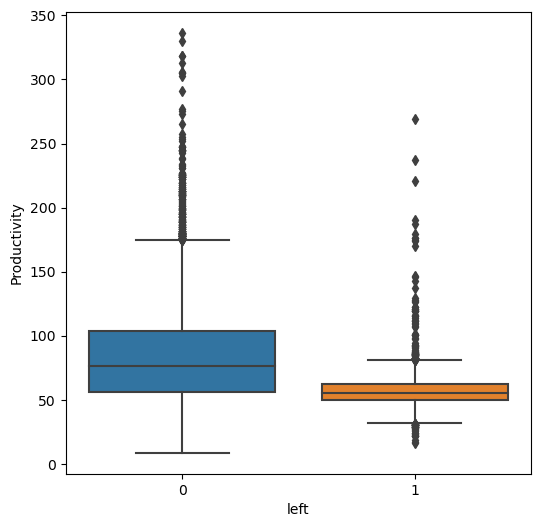

In [254]:
plt.figure(figsize=(6, 6))  
sns.boxplot(x= 'left', y='Productivity', data=df1 ) 

Productivity of 'left(1)' is overall lower than 'stayed(0)'. The means are also significantly different, this shows 'Productivity' might be a good differentiator of people who left and stayed.

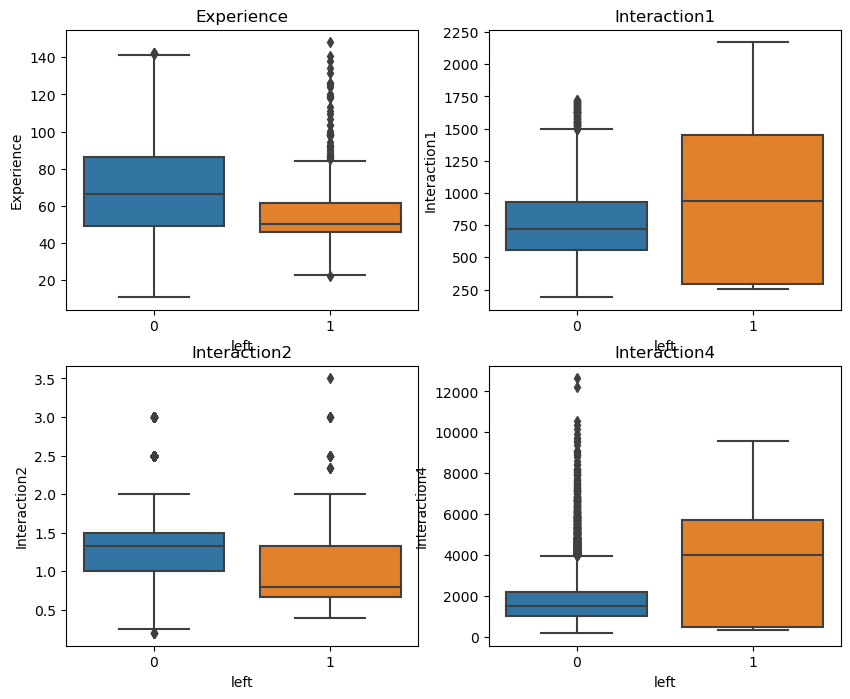

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  

axes = axes.flatten()  

y_vars = ['Experience', 'Interaction1', 'Interaction2', 'Interaction4']  

for ax, y_var in zip(axes, y_vars):  
    sns.boxplot(x='left', y=y_var, data=df1, ax=ax)  
    ax.set_title(y_var)  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


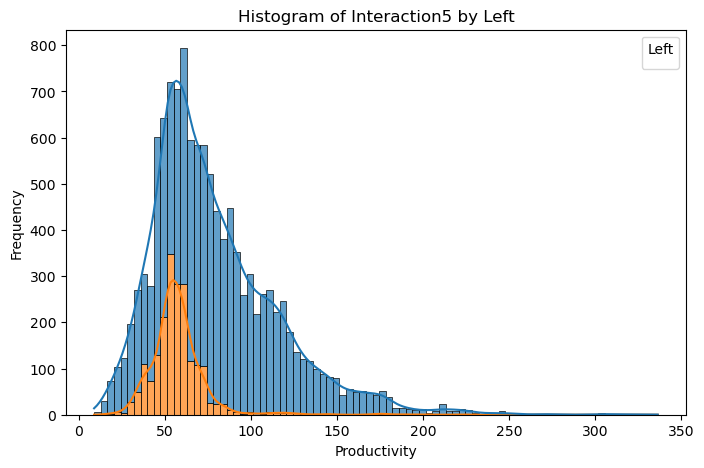

In [233]:
plt.figure(figsize=(8, 5))  
sns.histplot(data=df1, x='Productivity', hue='left',   
             multiple='stack', alpha=0.7, kde=True)  # 'multiple' can be 'stack', 'dodge', etc.  
plt.title('Histogram of Interaction5 by Left')  
plt.xlabel('Productivity')  
plt.ylabel('Frequency')  
plt.legend(title='Left')  
plt.show()  

In [243]:
df1.groupby(['Long Time Employee', 'left']).size()

Long Time Employee  left
0                   0       9366
                    1       1399
1                   0        634
                    1        592
dtype: int64

In [79]:
b = df1['left']
A = df1.drop(['left'], axis=1)

A_tr, A_test, b_tr, b_test = train_test_split(A, b, test_size=0.2, random_state=3)

A_train, A_val, b_train, b_val = train_test_split(A_tr, b_tr, test_size=0.25, random_state=3)

A_train.shape, A_val.shape, A_test.shape, b_train.shape, b_val.shape, b_test.shape

((7194, 8), (2398, 8), (2399, 8), (7194,), (2398,), (2399,))

In [257]:
b_val.value_counts()

0    2002
1     396
Name: left, dtype: int64

In [82]:
%%time
xgb_cv.fit(A_train, b_train)

print(xgb_cv.best_score_)
print(xgb_cv.best_params_)

0.908860759493671
{'colsample_bytree': 0.5, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 900}
Wall time: 10min 53s


In [273]:
b_pred = xgb_cv.best_estimator_.predict(A_val)
print("Recall:", "%.6f" % recall_score(b_val, b_pred))
print("F1 Score:", "%.6f" % f1_score(b_val, b_pred))

Recall: 0.940150
F1 Score: 0.953224


**After including all the extracted features individually and evaluating the model, we discover that 'Productivity' gives best accuracy but it is still slightly less than the original accuracy. The Validation and Recall score did not improve with any of the new features. We will therefore proceed to final testing
without any new features.**

# FINAL TESTING 

In [258]:
%%time
xgb_final = xgb_cv.best_estimator_.fit(X_tr, y_tr)  


Wall time: 313 ms


In [259]:
y_pred2 = xgb_final.predict(X_test)

In [270]:
get_scores('XGBoost', xgb_final, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,XGBoost,0.956743,0.928395,0.942356,0.980825,0.959935


In [271]:
# Create a classification report
target_labels = ['left(1)','stayed(0)']
print(classification_report(y_test, y_pred2, target_names=target_labels))

              precision    recall  f1-score   support

     left(1)       0.99      0.99      0.99      1994
   stayed(0)       0.96      0.93      0.94       405

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



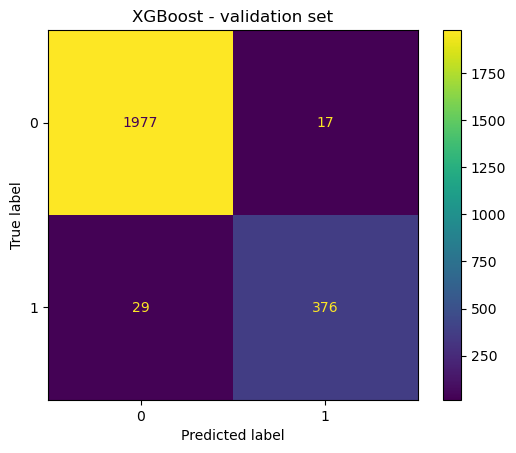

In [272]:
log_cm = confusion_matrix(y_test, y_pred2, labels = xgb_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels= xgb_cv.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title('XGBoost - Test set');
plt.show()

ROC AUC Score: 0.98


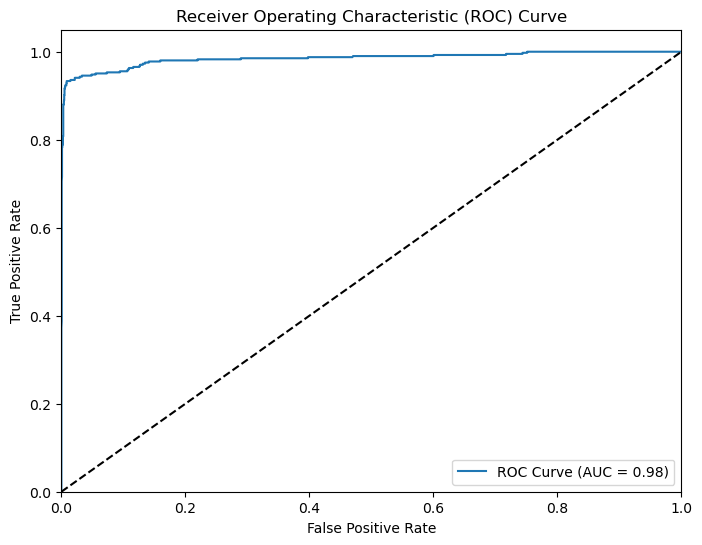

In [263]:
y_prob = xgb_cv.best_estimator_.predict_proba(X_test)[:, 1]  # Probability of positive class  

# Calculate ROC AUC score  
roc_auc = roc_auc_score(y_test, y_prob)  
print(f"ROC AUC Score: {roc_auc:.2f}")  

# Plot ROC Curve  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  

plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic (ROC) Curve')  
plt.legend(loc='lower right')  
plt.show()  

## Insights - 

#### Model
- Since the company's goal is customer retention and reducing turnover cost, our priority is to minimize False Negative errors(employees who are predicted stayed but actually left). Our final models predicts employees who left, very well(0.99 recall) compared to those who stayed(0.93 recall) (as shown in classification report). So our model is doing it's intended work well.
- 'Satisfaction' is the most helpful feature to predict emplyee churn.
- Removing features 'Department' and 'Salary_happiness' have increased model peformance by 0.37%

#### Data
- Consider either promoting employees who have been with the company for at least four years or conducting a deeper analysis to understand the reasons behind the dissatisfaction among employees with four years of tenure.
- More correlation is found in 'left' employees. For example, last_evaluation_score, 'average_monthly_hours', 'number_project' and 'time_spend_company' are all highly correlated to each other for former employees.




### Next Steps-

- There is likely non-linear hidden relationships in the data. They can be extracted through multi-dimensional modelling with higher dimensions.
- It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. Or instead conduct regular evaluations to check regular performance of the employee.
- Company can reward long working hours and long tenure with a promotion. They should focus on employee satisfaction. They can increase satisfaction by tweaking salaries or reducing working hours. Employees shouldn't feel overwhelmingly overburdened by projects and workload.
- There is a group of former employees with low satisfaction, low working hours and low last evaluation score. Many of these likely quit due to personal stress or demotivation. Employees like these require support and assistance. Company can consider to understand their problems and needs, to help them develop and provide such employees with support.
- Lastly, there is more scope of feature engineering. Features can be combined to see how their interaction can affect the model performance. Sometimes, these interactions reveal some hidden patterns and trends that individual features can't identify. 

